# <center> Project: Investigating data named (No-show appointments)

<center> Practitioner Name: Omar Allam

_________________________________
# Table of contents:
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Wrangling">Data Wrangling</a></li>
<li><a href="#EDA">EDA (Exploratoty Data Analysis)</a></li>
<li><a href="#Conclusion">Conclusion</a></li>
</ul>


<a id='Intro'></a>
## Introduction:
_________________________________
### 1- Dataset Description:
- This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
- The data has 110527 rows and 14 columns.
_________________________________
### 2- Columns' description:

> `PatientId`: Identification of each patient.

> `AppointmentID`: Identification of each appointment.

> `Gender`: Gender of the patient. (F : Female , M : Male)

> `ScheduledDay`: Day when the patient set up the appointment.

> `AppointmentDay`: Day of the appointment at teh hospital.

> `Age`: Age of the patient.

> `Neighbourhood`: Location of the hospital.

> `Scholarship`: If the patient enrolled in Bolsa Família for poor Brazilian or not. (0 : didn't enrol , 1 : enrolled)

> `Hipertension`: If the patient suffers Hypertension "raise in blood pressure" or not. (0 : doesn't suffer , 1 : suffers) 

> `Diabetes`: If the patient suffers Diabetes or not. (0 : doesn't suffer , 1 :  suffers)

> `Alcoholism`: If the patient is Alcohol addicted or not. (0 : No , 1 : Yes)

> `Handcap`: No Info about this column in the documentaion "the name may be misspilled"

> `SMS_received`: As in the documentation, it is the number of SMS received by the patient from the hospital. (0 : No-SMS , 1 : one-SMS)

> `No-show`: If the patient cancel its appointment or not. (Yes : canceled , No : not-canceled)  

<a id='Wrangling'></a>
## Data Wrangling:



### 1- Loading Data & Libraries:


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [71]:
df = pd.read_csv('No_show_data.csv',parse_dates=['ScheduledDay','AppointmentDay']) 
# I have used parse_dates for these two columns after I invistigated the data.

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


_________________________________
### 2- InMind Questions:

###### General Questions related to the existence of: 

* missing values?
* wrong datatypes for columns?
* complete duplicates in the data?
* outliers in each column?


###### Univariate Questions:

* Which `Gender` is more healthier than the other depending on number of enteries?
* Which `Age` values are valid or there are values like 1000..,etc?   
* Which disease among `Hipertension`, `Diabetes` and `Alcoholism` is most dominant?

###### Bivariate Questions:

* Is the number of `PatientId` same as `AppointmentID` or may be more than one appointment for the same patient?
* Does Receiving `Scholarship` has strong effect on not cancelling the appointment or not?
* Does the period between `AppointmentDay` and `ScheduleDay` has effect on cancelling the appointment?
_________________________________

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [73]:
df.duplicated().any()

False

_________________________________
##### Above cells' conclusion:

* Data has no missing values.
* Data has no complete duplicates.
* `PatientId` & `AppointmentID` need some modifications.
* `Handcap` column isn't understandable from the documentation
* We may rename `No-show` as `Canceled` to avoid confusion of the column values.
_________________________________

### 3- Cleaning:

In [74]:
# discovering `Handcap` column:

df['Handcap'].value_counts() # output values aren't understandable 

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [75]:
# Discovering what is wrong with ID_columns

df['PatientId'].nunique() , df['AppointmentID'].nunique()

(62299, 110527)

_________________________________
##### From the above, we have noticed that:

*It seems some patients have more than one appointment. Therefore:*
- We may drop `AppointmentID` for simplicity, because its unique values are as much as the total rows of the DataFrame
- We will also drop `HandCap` because its values aren't understandable (in order not to mislead our results)
_________________________________

In [76]:
df = df.drop(columns = ['AppointmentID','Handcap'],axis = 1)
df.duplicated().any()

True

In [77]:
# dropping those complete duplicates "the following will remove the duplicated rows and keep only the `first` row"

df = df.drop_duplicates(ignore_index = True)
df.duplicated().any()

False

In [78]:
# replacing `PatientId` enteries with ndarray (from 0 to 62298 "number of unique values in the column") 

rep_array = np.arange(0,df['PatientId'].value_counts().shape[0])
df['PatientId'] = df['PatientId'].replace(to_replace = df['PatientId'].unique() , value = rep_array)
df['PatientId'] = df['PatientId'].astype('object')


In [79]:
# renaming `No-show` column for avoiding confusion of its enteries "Yes", "No": 

df.rename(columns = {'No-show':'Canceled'},inplace=True)

_________________________________
* After we have cleaned the wrong datatypes, we are safe to run `.describe()` with continous columns. 
_________________________________

In [80]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received
count,109909.000000,109909.000000,109909.000000,109909.000000,109909.000000,109909.000000
mean,37.086472,0.098281,0.197236,0.071814,0.030425,0.322831
std,23.121491,0.297696,0.397914,0.258181,0.171755,0.467561
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000


_________________________________
##### From the above, we have noticed that:

* Columns like `Scholarship`, `Hipertension`, `Diabetes`, `Alcoholism` and `SMS_received` are all categorical columns with values 0,1 not actually continous columns. Therefore, we must change their datatypes.
* `Age` column has some invalid negative values.
_________________________________

> ***1. Fixing datatypes***


In [81]:
cat_col = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']
df[cat_col] = df[cat_col].astype('category')

> ***2. Fixing `Age` Column***
 

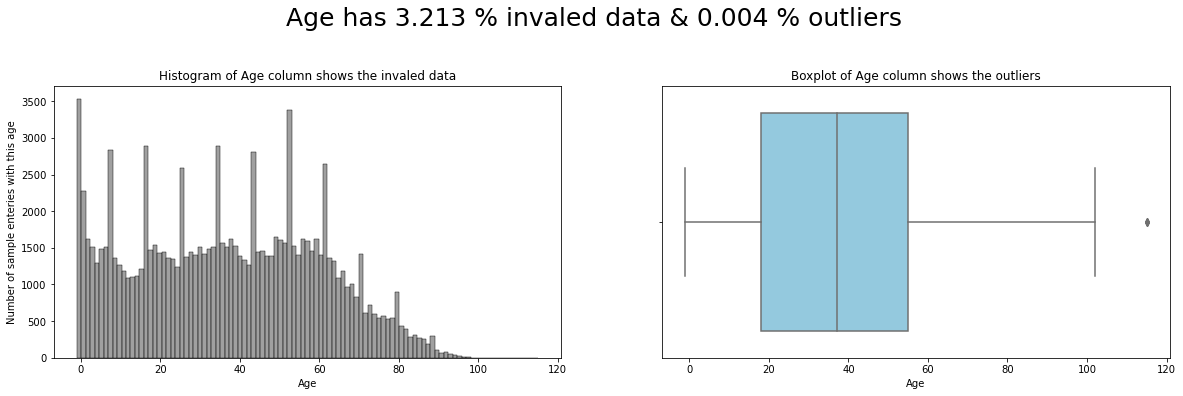

In [82]:
### discovering ###


outliers_l = 0 # declared to be gloabl variable used inside the following function

def plot_age():    
    """ This funcion is to be used in another cell """
    
    # for invalid_ages "negative & zero"
    invaled_percentage = f"{(100 * df[df['Age'] <= 0].shape[0] / df.shape[0] ) :0.3f} %" 

    #for outliers:
    q1,q3 = np.quantile(df['Age'],[0.25, 0.75])
    IQR   = q3 - q1
    global outliers_l
    outliers_l = (q3 + 1.5*IQR) 
    outliers_percentage= f"{(100 * df[ df['Age'] > outliers_l ].shape[0] / df.shape[0] ) :0.3f} %" 


    # for figuring subplots
    
    fig,ax = plt.subplots(1,2,figsize=(20,5))
    sns.histplot(ax=ax[0],data=df,x='Age',bins= df['Age'].unique().shape[0]-1,color = 'gray') # for histogram
    sns.boxplot(ax=ax[1],data=df,x='Age',color = 'skyblue') # for boxplot 

    # note the above two subplots must be axes-level not figure-level like `displot` or `catplot` to be compatible with subplots
    
    ax[0].set_ylabel('Number of sample enteries with this age')
    ax[0].set_title('Histogram of Age column shows the invaled data')
    ax[1].set_title('Boxplot of Age column shows the outliers')
    plt.suptitle(f'Age has {invaled_percentage} invaled data & {outliers_percentage} outliers',y=1.1,size =25);

plot_age()


__________________________

From the above plot, `Age` has **3.213 %** invaled data & **0.004 %** outliers
__________________________

In [83]:
# We will fill the invaled and outliers ages with either `Males_mean_age or Females_mean_age` depending on the value of 
# Gender in each entry

Condition_1 =  (df['Age'] <= outliers_l) | (df['Age'] > 0)  
valid_age_data = df.loc[ Condition_1 ]

m_males , m_females = valid_age_data.groupby('Gender').mean()['Age']  # getting the mean_age for males and females


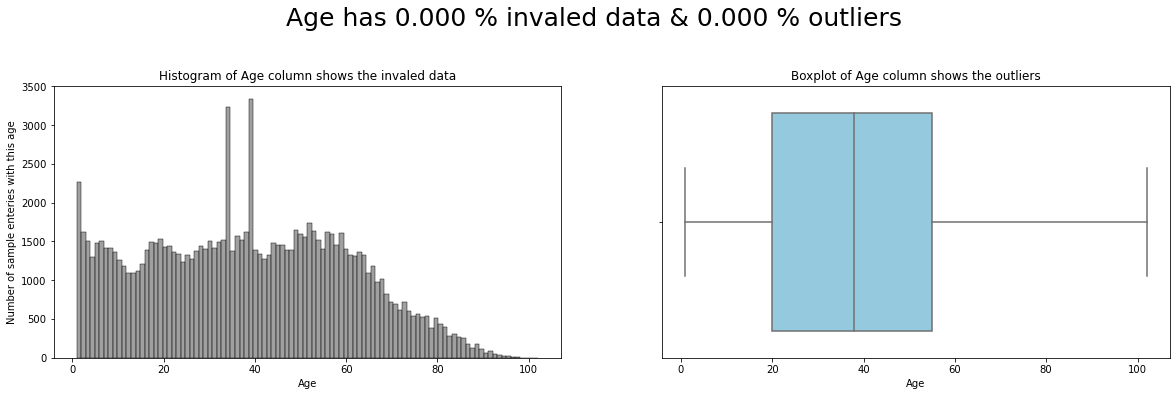

In [84]:
### filling invaled data & outliers ###

Condition_M = (df['Gender'] == 'M') & ( (df['Age'] > outliers_l) | (df['Age'] <= 0) )
Condition_F = (df['Gender'] == 'F') & ( (df['Age'] > outliers_l) | (df['Age'] <= 0) ) 


df.loc[ Condition_M , 'Age' ] = m_males
df.loc[ Condition_F , 'Age' ] = m_females

plot_age()  # function declared in the a previous cell to draw histogram & box_plot for `Age` column



_______________________

From the above plot, `Age` has **0 %** invaled data & **0 %** outliers
__________________________

_________________________________
#### For Cleaning Summary, I did the following:

1. dropped `AppointmentID` and `HandCap` Columns.
2. replaced `PatientId` values with `0 -> 62298` values
3. renamed `No-show` to `Canceled`
4. changed the datatypes for `Scholarship`, `Hipertension`, `Diabetes`, `Alcoholism` and `SMS_received`
5. replaced wrong values in the `Age` column
# <center> _______________________________________________________

<a id='EDA'></a>
## EDA (Exploratory Data Analysis):

### 1.1- Univariate Analysis:
_________________________________
* Which `Gender` is more healthier than the other depending on number of enteries?
* Which disease among `Hipertension`, `Diabetes` and `Alcoholism` is most dominant?
_________________________________

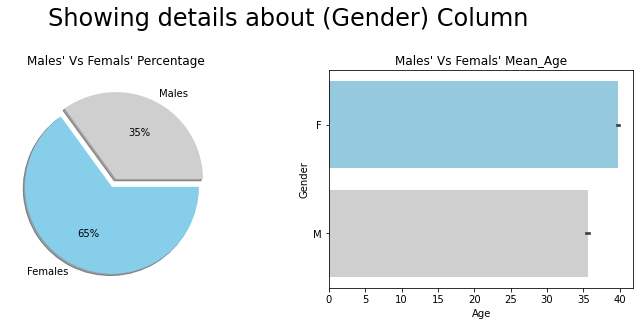

In [85]:
# plotting 'Males' vs 'Females'

fig, ax = plt.subplots(1,2,figsize=(12,4))

data = [ df['Gender'].value_counts()['M'], df['Gender'].value_counts()['F'] ]
ax[0].pie(data,labels = ['Males','Females'], explode = [0, 0.1] , autopct='%.0f%%' , shadow = True , colors = ['#CFCFCF','skyblue'])

sns.barplot(ax = ax[1], data = df, x = 'Age' , y = 'Gender', palette = ["skyblue", "#CFCFCF"])

ax[0].set_title("Males' Vs Femals' Percentage")
ax[1].set_title("Males' Vs Femals' Mean_Age")

fig.suptitle("Showing details about (Gender) Column",y = 1.1, size = 24);

___________________
From the above plots:

* `Females` % reserved appointments is > `Males` %.
* `Females` who reserved appointments are **40-year** old on average. 
* `Males` who reserved appointments are **35-year** old on average.
___________________

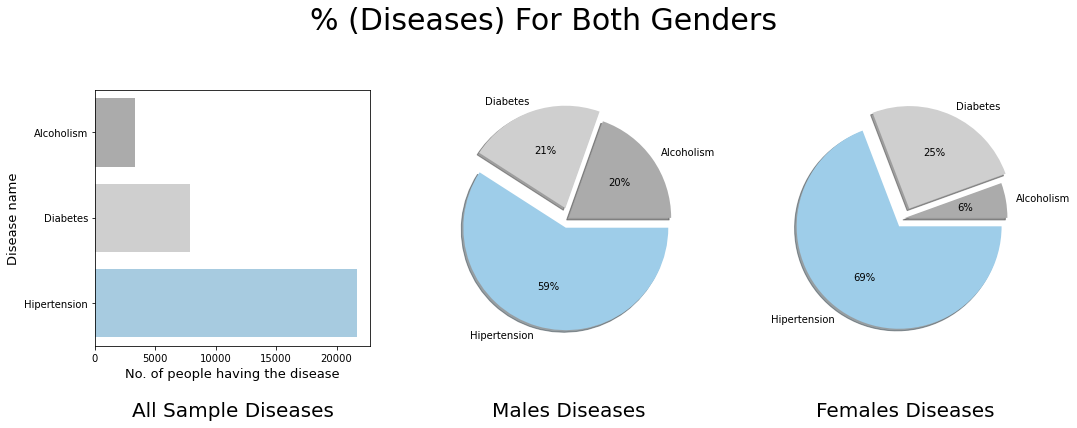

In [86]:
# Visualizing each disease percentage for the two Genders

M_Al = df[ df['Gender'] == 'M' ]['Alcoholism'].value_counts() [1]
M_Di = df[ df['Gender'] == 'M' ]['Diabetes'].value_counts() [1]
M_Hi = df[ df['Gender'] == 'M' ]['Hipertension'].value_counts() [1]

F_Al = df[ df['Gender'] == 'F' ]['Alcoholism'].value_counts() [1]
F_Di = df[ df['Gender'] == 'F' ]['Diabetes'].value_counts() [1]
F_Hi = df[ df['Gender'] == 'F' ]['Hipertension'].value_counts() [1]

data_M = [ M_Al, M_Di, M_Hi ]
data_F = [ F_Al, F_Di, F_Hi ]

data_All = np.array(data_M) + np.array(data_F)
data_All 

lab = ['Alcoholism','Diabetes','Hipertension']
ex = [0, 0.1,0.1] 
col =['#ABABAB','#CFCFCF','#9ECDE9'] 



fig,ax = plt.subplots(1,3,figsize=(16,6))


sns.barplot(ax=ax[0],y = lab , x = data_All, palette =col) # 1st plot (all diseases)
ax[1].pie(data_M ,labels= lab,explode = ex , autopct='%.0f%%' , shadow = True , colors = col) # 2nd plot (Males)
ax[2].pie(data_F ,labels= lab,explode = ex , autopct='%.0f%%' , shadow = True , colors = col) # 3rd plot (Females)

ax[0].set_xlabel('No. of people having the disease',size =13)
ax[0].set_ylabel('Disease name',size =13)
ax[0].set_title('All Sample Diseases',y = -.3,size = 20)
ax[1].set_title('Males Diseases',y = -.3,size = 20)
ax[2].set_title('Females Diseases',y = -.3,size = 20)

fig.tight_layout(pad=4)
fig.suptitle('% (Diseases) For Both Genders', y = 1.1,size = 30);

___________________
From the above plots:

* `Hypertension` is by far the most dominant disease for the appointments.
* `Females` are less addected to `Alcohol` tha `Males`.
___________________

### 1.2- Univariate Conclusion:
>  #### I have concluded that:

* In our sample, `Females` care with their health more than `Males` as they reserved more appointments.
* The most dominant disease in our sample is `Hypertension`.
* % of `Alcohol` additction is, by far, higher in `Males` than `Females`.   ''' It's a bivariate conclusion '''
______________________________________________

### 2.1- Bivariate Analysis:
_________________________________
* Does Receiving `Scholarship` has strong effect on not cancelling the appointment or not?
* Does the period between `AppointmentDay` and `ScheduledDay` has effect on cancelling the appointment?
* Does `Gender` has effect on Cancelling an appointment?
_________________________________

In [87]:
df['Scholarship'].unique()

[0, 1]
Categories (2, int64): [0, 1]

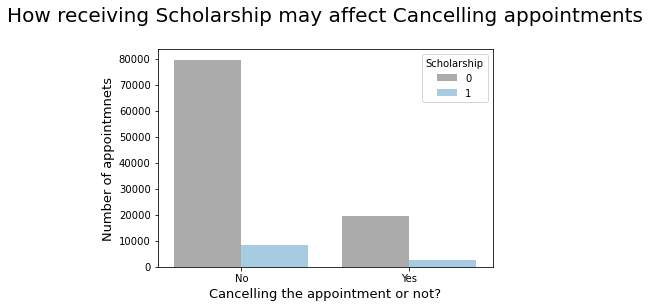

In [88]:
sns.countplot(data = df, x = 'Canceled',hue='Scholarship', palette =['#ABABAB','#9ECDE9'] )
plt.xlabel('Cancelling the appointment or not?',size =13)
plt.ylabel('Number of appointmnets',size =13)
plt.title('How receiving Scholarship may affect Cancelling appointments',y =1.1, size=20);

______________________________
From the above plot:
* Appointments that aren't canceled tend to be for those who received a `Scholarship` more.

______________________________

In [89]:
(df['AppointmentDay'] - df['ScheduledDay']).describe()

count                        109909
mean      9 days 16:29:13.462873832
std      15 days 05:45:20.798050125
min               -7 days +10:10:40
25%               -1 days +15:40:32
50%                 3 days 10:54:03
75%                14 days 06:18:04
max               178 days 13:19:01
dtype: object

____________________
###### The appeared -ve values are misleading. so we will explore those columns in more details: 
___________________

In [90]:
df [ ['ScheduledDay', 'AppointmentDay'] ]

,ScheduledDay,AppointmentDay
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00
...,...,...
109904,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00
109905,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00
109906,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00
109907,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00


_________________________________
* we show that the `AppointmentDay` shows only date and not time while `ScheduledDay` show both 
 so if they are the same date, it may appear -ve values thanks to this incompatibility.

*Therefore, I will drop **time** and just keep **year**, **month** and **day** of those two columns*
_________________________________

In [91]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'].dt.strftime('%Y-%m-%d') )
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'].dt.strftime('%Y-%m-%d') )

In [92]:
df['ReservationPeriod'] = (df['AppointmentDay'] - df['ScheduledDay']) 
df[ df['ReservationPeriod'] < pd.Timedelta(0) ]   

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,Canceled,ReservationPeriod
26882,3103.0,M,2016-05-10,2016-05-09,38.0,RESISTÊNCIA,0,0,0,0,0,Yes,-1 days
54938,24091.0,F,2016-05-18,2016-05-17,19.0,SANTO ANTÔNIO,0,0,0,0,0,Yes,-1 days
63818,35601.0,F,2016-05-05,2016-05-04,22.0,CONSOLAÇÃO,0,0,0,0,0,Yes,-1 days
71077,45038.0,F,2016-05-11,2016-05-05,81.0,SANTO ANTÔNIO,0,0,0,0,0,Yes,-6 days
71902,45368.0,M,2016-05-04,2016-05-03,7.0,TABUAZEIRO,0,0,0,0,0,Yes,-1 days


_________________________________
Even after this cleaning, I have found five enteries with -ve `Reservation_period` value, 
I will drop them as they are only **5_enteries** out of **109909**
________________________________

In [93]:
# concerting the columns to numeric instead of datetime for further plotting 
df['ReservationPeriod'] = df['ReservationPeriod'].dt.days

In [94]:
df['Canceled'].value_counts()

No     87804
Yes    22105
Name: Canceled, dtype: int64

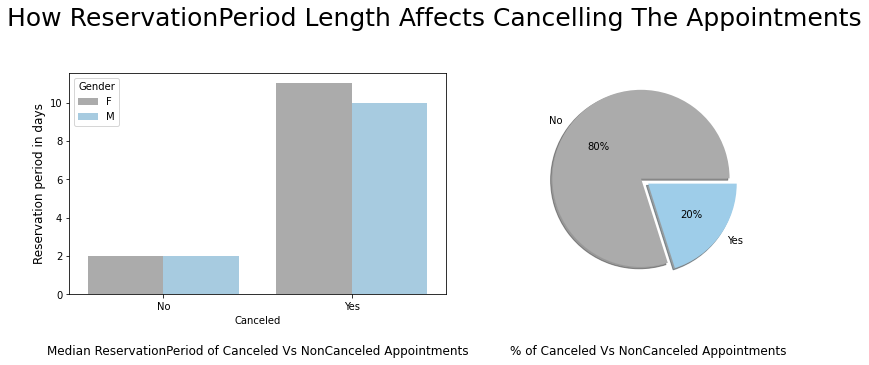

In [95]:
fig, ax = plt.subplots(1,2, figsize = (12,5))

sns.barplot(ax= ax[0], data =df, x = 'Canceled', y= 'ReservationPeriod',estimator = np.median, palette = ['#ABABAB','#9ECDE9'], ci = False, hue ='Gender')
ax[1].pie(df['Canceled'].value_counts().values , labels = ['No', 'Yes'], autopct='%.0f%%',explode = [0.1,0],shadow =True,colors = ['#ABABAB','#9ECDE9'])


ax[1].set_title('% of Canceled Vs NonCanceled Appointments', y = -.3)
ax[0].set_title('Median ReservationPeriod of Canceled Vs NonCanceled Appointments', y = -.3)
ax[0].set_ylabel('Reservation period in days', size = 12)

fig.tight_layout(pad=3)
fig.suptitle('How ReservationPeriod Length Affects Cancelling The Appointments', y = 1.1,size = 25,horizontalalignment = 'center');

_________________________________
*It appears from the above plots that:* 

* `20 %` of our sample appointments are cancelled.
* Longer`ReservationPeriod` contributes to those cancelled appointments.
* `Gender` has no notable effect on cancelling appointments.
________________________________

### 2.2- Bivariate Conclusion:

_________________________________
> ### I have concluded that:

* Receiving `Scholarship` has strong effect on not cancelling the appointment.
* Longer`ReservationPeriod` __ period between `AppointmentDay` and `ScheduledDay` __ contributes to those cancelled appointments.
* `Gender` has no notable effect on cancelling appointments.

_________________________________


<a id='Conclusion'></a>
## Conclusion:
_______________________
> ## Reached Results:

#### I go through a 110527-row and 14-column dataset about medical appointments in Brazil in order to discover which features affects the meeting being Canceled or not.

#### First, the data has to be cleaned and I:

1. dropped `AppointmentID` and `HandCap` Columns.
2. replaced `PatientId` values with `0 -> 62298` values.
3. renamed `No-show` to `Canceled` for avoiding confusion.
4. changed the datatypes for `Scholarship`, `Hipertension`, `Diabetes`, `Alcoholism` and `SMS_received`.
5. replaced wrong values in the `Age` column.


#### Then, I came with some insights from the analysis that:

1. In our sample, `Females` care with their health more than `Males` as they reserved more appointments.
2. The most dominant disease in our sample is `Diabetes`.
3. % of `Alcohol` additction is, by far, higher in `Males` than `Females`.  
4. Receiving `Scholarship` has strong effect on not cancelling the appointment.
5. Longer`ReservationPeriod` __ period between `AppointmentDay` and `ScheduledDay` __ contributes to those cancelled appointments.
6. `Gender` has no notable effect on cancelling appointments.

#### After that, I concluded the main objective that:

* Receiving financial `Scholarship` & geting shorter `ReservationPeriod` for the appointment are the most two features that may tend to lower the number of Canceled appointments 


> ## Limitations:

#### There are two limitations in this data:

1. `Handcap` has no documentation in the kaggle description & its name has no translation so it may be important but we cannot understand it.
2. Discription of data on kaggle shows that `SMS_received` is a field indicates number of message received but in this data it is only binary field with either **0** or **1** which may reflect misleading understand.
